# Thinking

### 1 既然内容相似度计算简单，能频繁更新，为什么还需要协同过滤算法呢？

使用内容相似度的方法依赖于打标签，一方面存在成本问题，另一方面标签的粒度会严重影响推荐效果，且完成内容相似度的计算及推荐任务往往需要对内容数据有很高的属性维度要求，现实中可能很难达到。协同过滤是基于分析用户与商品之间的交互方法完成推荐，与基于内容计算相似度不同，不仅仅考量商品本身之间的属性相似度，而是引入了用户对物品的行为，可以针对不同用户实现个性化的推荐，从推荐列表中过滤掉用户不感兴趣的物品，使得需求更好的得到满足。

### 2.你需要推荐系统么？哪些情况下不需要推荐系统？	

推荐系统是针对用户的需求完成个性化的定制，更好的满足用户的喜好，或是根据数据分析手段帮助购买目标不明确的用户缩小挑选范围，更快捷的找到自己感兴趣的目标商品，完成筛选。大多数人在信息过载的时代都需要推荐系统帮助自己获取有效信息和服务，但是部分情况下，比如关注自身隐私权不愿个人信息泄露的用户或是避免信息接收过多的用户，推荐系统是不必要的。

### 3.如果给一个视频打标签，视频中有音乐作为背景音乐，采用了NLP方式对内容自动打标签，可能存在什么问题？		

NLP处理仅能针对文字方面的信息，音乐元素的缺失可能造成信息不准确影响标签的真实性。如果视频内容缺少文字对白不结合CV相关技术的分析甚至会出现标签内容为空的情况，也是成本的浪费。

# Action

### 针对mnist数据集进行分类，采用CART决策树（工具使用sklearn中的CART），课程中的代码请见GitHub

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 导入数据

In [76]:
from sklearn.datasets import load_digits
import numpy as np

In [77]:
digits = load_digits()
digits.data.shape

(1797, 64)

图片尺寸8*8

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
1


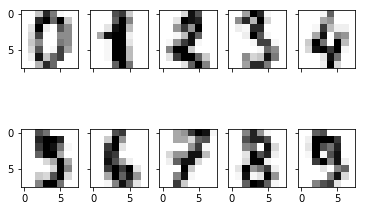

In [78]:
print(digits.data[1])
print(digits.target[1])
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
ax=ax.flatten()
for i in range(10):
    img=digits.images[i]
    ax[i].imshow(img,cmap='Greys', interpolation='nearest')

### 训练模型

In [59]:
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [60]:
X_data = digits.data.astype(np.float32)
Y_data = digits.target.astype(np.float32).reshape(-1,1)
print(X_data.shape)
print(Y_data.shape)

(1797, 64)
(1797, 1)


In [79]:
#归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data=scaler.fit_transform(X_data)

In [80]:
train_X,test_X,train_y,test_y=train_test_split(X_data,Y_data,test_size=0.2)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [82]:
tree = DecisionTreeClassifier()

tree.fit(train_X, train_y)

predict_y=tree.predict(test_X)

print('cart决策树准确率: %0.4lf' % accuracy_score(predict_y, test_y))

cart决策树准确率: 0.8389


# 以上为作业部分

### 与其他一些模型比较 

In [101]:
from sklearn.linear_model import LogisticRegression#逻辑回归
from sklearn.linear_model import LinearRegression#线性回归
from sklearn.svm import SVC# svm
from sklearn.naive_bayes import BernoulliNB #高斯朴素贝叶斯 GaussianNB/MultinomialNB/BernoulliNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import  AdaBoostClassifier #AdaBoost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm.sklearn import LGBMClassifier
import lightgbm as lgbm

In [89]:
model= LogisticRegression(solver='liblinear', multi_class='auto') #数据集比较小，使用liblinear，数据集大使用 sag或者saga
model.fit(train_X, train_y)
predict_y=model.predict(test_X)
print('逻辑回归准确率: %0.4lf' % accuracy_score(predict_y, test_y))

逻辑回归准确率: 0.9639


C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
model= SVC(C=1,gamma='auto',kernel='rbf')
model.fit(train_X, train_y)
predict_y=model.predict(test_X)
print('svm准确率: %0.4lf' % accuracy_score(predict_y, test_y))

svm准确率: 0.9694


C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
model= KNeighborsClassifier()
model.fit(train_X, train_y)
predict_y=model.predict(test_X)
print('knn准确率: %0.4lf' % accuracy_score(predict_y, test_y))

knn准确率: 0.9750


C:\Users\wangcc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [92]:
model= BernoulliNB()
model.fit(train_X, train_y)
predict_y=model.predict(test_X)
print('朴素贝叶斯准确率: %0.4lf' % accuracy_score(predict_y, test_y))

朴素贝叶斯准确率: 0.8417


C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
model_neibu= DecisionTreeClassifier(max_depth=5,min_samples_leaf=1)
model=AdaBoostClassifier(model_neibu,learning_rate=0.1,n_estimators=1000)
model.fit(train_X, train_y)
predict_y=model.predict(test_X)
print('adaboost准确率: %0.4lf' % accuracy_score(predict_y, test_y))

C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaboost准确率: 0.9500


In [104]:
model= LGBMClassifier(silent=False,max_depth=5,n_estimators=1000,boosting_type='gbdt',learning_rate=0.1)
model.fit(train_X, train_y)
predict_y=model.predict(test_X)
print('lightGBM准确率: %0.4lf' % accuracy_score(predict_y, test_y))

C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


lightGBM准确率: 0.9750


In [106]:
model=LinearDiscriminantAnalysis(n_components=2)
model.fit(train_X, train_y)
predict_y=model.predict(test_X)
print('lda准确率: %0.4lf' % accuracy_score(predict_y, test_y))

lda准确率: 0.9500


C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wangcc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
